## Part A

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [131]:
df1= pd.read_csv("C:\\Users\\91630\\Downloads\\TelcomCustomer-Churn_1.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [132]:
df2= pd.read_csv('C:\\Users\\91630\\Downloads\\TelcomCustomer-Churn_2.csv')
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [135]:
df1.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
dtype: int64

In [136]:
df2.isnull().sum()

customerID          0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [137]:
df2= pd.read_csv("C:\\Users\\91630\\Downloads\\TelcomCustomer-Churn_2.csv", na_values = ' ')

In [138]:
df2.isnull().sum()

customerID           0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There is 11 null values in df2

In [139]:
df2.dropna(inplace = True)

In [140]:
df2.isnull().sum()

customerID          0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

All null values are dropped

Merging the data 

In [141]:
df=pd.merge(df1,df2,on='customerID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features

In [142]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
df=df.drop(['customerID'],axis=1)

In [144]:
data_types_dict = {'gender': 'category', 'SeniorCitizen':'category', 'Partner':'category', 'Dependents':'category',
                   'PhoneService':'category', 'MultipleLines':'category', 'InternetService':'category',
                   'OnlineSecurity':'category', 'OnlineBackup':'category', 'DeviceProtection':'category',
                   'TechSupport':'category', 'StreamingTV':'category', 'StreamingMovies':'category', 'Contract':'category',
                   'PaperlessBilling':'category', 'PaymentMethod':'category','Churn':'category'}
df=df.astype(data_types_dict)
df.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

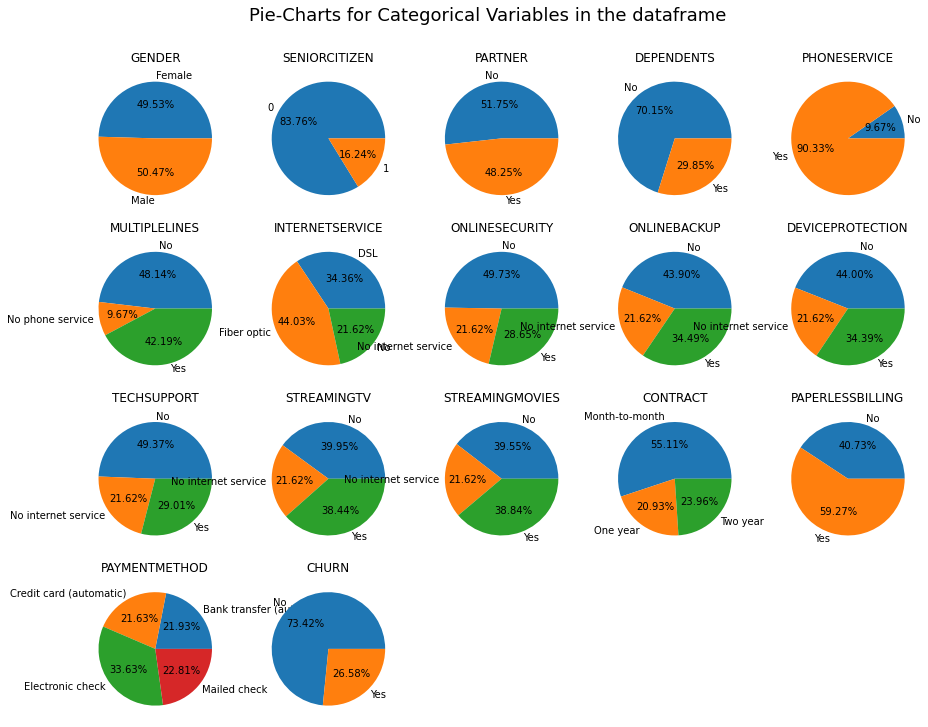

In [145]:
def CategoricalVar(df_pie,m):

    a = []
    for i in df_pie:
        a.append(i)
    
    b = []
    for i in a:
        if (df[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    ncols = m
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    for n, i in enumerate(b):
        ax = plt.subplot(nrows, ncols, n + 1)
        df.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()
    
CategoricalVar(df,5) 

1. There are almost equal numbers of male and female.
2. 83.76% of customers are not senior citizen.
3. 51.75% of customers are not a partner while 48.25% of customer are partner.
4. 70% of customers are dependents
5. 90% of customers have taken phone service.
6. 48.14% of customers have not taken multipleline while 42.19% of customers have taken multipleline and rest don't have phone service.
7. Approx 44% of customers have taken fiber optic and 34.36% of customers have taken DSL service.
8. 49.73% of customers do not have online security and 28.65% have online security and rest do not have internet services.
9. In online backup chart we can see that 43.9% of customers have no backup while 34.5% of customers have online backup and rest have no internet serivce.
10. In device protection chart we can see that 44% of customers have no device protection while 34.5% of customers have device protection and rest have no internet serivce.
11. In techsupport chart we can see that 49.3% of customers have no techsupport while 29% of customers have techsupport and rest have no internet serivce.
12. In streming TV and streaming moives chart we can see that 40% of customers have no streming TV while 38.44% of customers have streming TV and rest have no internet serivce.
13. In contract chart we can see that 55.11% of customers have no month to month contract while 24% of customers have 2 years of contract and rest have a year of contract.
14. 59.27% of the customers have paperless billing and 40.73% customers not hve paperless billing.
15. 21.63% of the customers pay via credit card and 21.93% of the customers pay via bank transfer and 33.63% of the customers pay via electronic check and rest of the customers pay via mailed check.
16. 73.4% of the customers do not churn while 26.58% of the customers do churn.

In [146]:
replacestruct = {
    'gender':{'Female':1, 'Male':2},
    'Partner':{'Yes':1, 'No':0},
    'Dependents':{'Yes':1, 'No':0}, 'PhoneService':{'Yes':1, 'No':0}, 'MultipleLines':{'Yes':1, 'No':0, 'No phone service':2},
    'InternetService':{'DSL':1, 'Fiber optic':2, 'No':0}, 'OnlineSecurity':{'Yes':1, 'No':0, 'No internet service':2},
    'OnlineBackup':{'Yes':1, 'No':0, 'No internet service':2}, 'DeviceProtection':{'Yes':1, 'No':0, 'No internet service':2},
    'TechSupport':{'Yes':1, 'No':0, 'No internet service':2}, 'StreamingTV':{'Yes':1, 'No':0, 'No internet service':2},
    'StreamingMovies':{'Yes':1, 'No':0, 'No internet service':2}, 'Contract':{'Month-to-month':1, 'One year': 2, 'Two year':3},
    'PaperlessBilling':{'Yes':1, 'No':0},
    'PaymentMethod':{'Bank transfer (automatic)':1, 'Credit card (automatic)':2, 'Electronic check':3, 'Mailed check':4},
    'Churn':{'Yes':1, 'No':0}
}

df=df.replace(replacestruct)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,1,1,3,29.85,29.85,0
1,2,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,4,56.95,1889.50,0
2,2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,4,53.85,108.15,1
3,2,0,0,0,45,0,2,1,1,0,1,1,0,0,2,0,1,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,3,70.70,151.65,1
5,1,0,0,0,8,1,1,2,0,0,1,0,1,1,1,1,3,99.65,820.50,1
6,2,0,0,1,22,1,1,2,0,1,0,0,1,0,1,1,2,89.10,1949.40,0
7,1,0,0,0,10,0,2,1,1,0,0,0,0,0,1,0,4,29.75,301.90,0
8,1,0,1,0,28,1,1,2,0,0,1,1,1,1,1,1,3,104.80,3046.05,1
9,2,0,0,1,62,1,0,1,1,1,0,0,0,0,2,0,1,56.15,3487.95,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   int64   
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   int64   
 3   Dependents        7032 non-null   int64   
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   int64   
 6   MultipleLines     7032 non-null   int64   
 7   InternetService   7032 non-null   int64   
 8   OnlineSecurity    7032 non-null   int64   
 9   OnlineBackup      7032 non-null   int64   
 10  DeviceProtection  7032 non-null   int64   
 11  TechSupport       7032 non-null   int64   
 12  StreamingTV       7032 non-null   int64   
 13  StreamingMovies   7032 non-null   int64   
 14  Contract          7032 non-null   int64   
 15  PaperlessBilling  7032 non-null   int64   
 16  PaymentMethod     7032 n

## Splitting data and Standardize the data

In [148]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X = df.drop("Churn" , axis=1)
y = df.pop("Churn")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Build Decision Tree Model

In [149]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [150]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9976888888888888
0.7213930348258707


In [151]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7909333333333334
0.7903340440653873


0.8045486851457001


<AxesSubplot:>

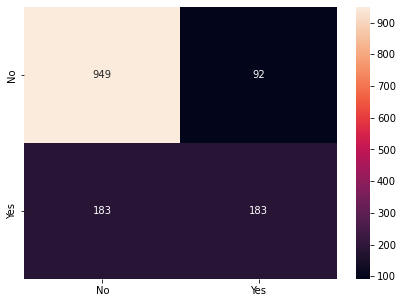

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## XGB Boost

In [159]:
import xgboost as xgb

reg=xgb.XGBClassifier(n_estimator=10, learning_rate=0.01)
reg.fit(X_train,y_train)

[15:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimator=10,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

0.7974413646055437


<AxesSubplot:>

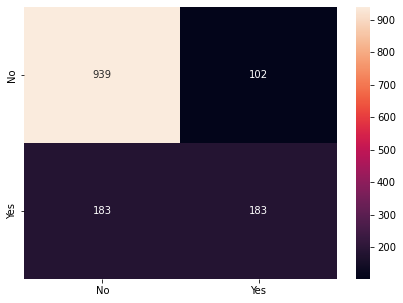

In [160]:
y_pred=reg.predict(X_test)

print(reg.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Changing parameter for better accuracy

In [167]:
reg1=xgb.XGBClassifier(max_depth=3, gamma= 1)
reg1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

0.8031272210376688


<AxesSubplot:>

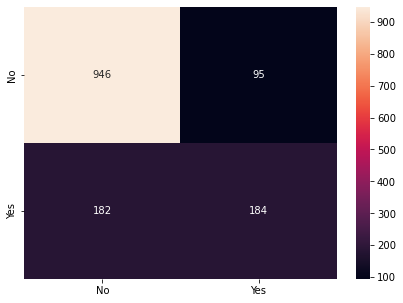

In [168]:
y_pred1=reg1.predict(X_test)

print(reg1.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred1,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Part B

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

### Reading file

In [45]:
df= pd.read_csv("C:\\Users\\91630\\Downloads\\TelcomCustomer-Churn_1.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


### dropping null value

In [46]:
df.dropna(inplace = True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [47]:
data_types_dict = {'gender': 'category', 'SeniorCitizen':'category', 'Partner':'category', 'Dependents':'category',
                   'PhoneService':'category', 'MultipleLines':'category', 'InternetService':'category',
                   'OnlineSecurity':'category'}

df=df.astype(data_types_dict)
df.dtypes

customerID           object
gender             category
SeniorCitizen      category
Partner            category
Dependents         category
tenure                int64
PhoneService       category
MultipleLines      category
InternetService    category
OnlineSecurity     category
dtype: object

In [48]:
df=df.drop(['customerID'],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,Female,0,Yes,No,1,No,No phone service,DSL,No
1,Male,0,No,No,34,Yes,No,DSL,Yes
2,Male,0,No,No,2,Yes,No,DSL,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No


In [49]:
replacestruct = {
    'gender':{'Female':1, 'Male':2},
    'Partner':{'Yes':1, 'No':0},
    'Dependents':{'Yes':1, 'No':0}, 'PhoneService':{'Yes':1, 'No':0}, 'MultipleLines':{'Yes':1, 'No':0, 'No phone service':2},
    'InternetService':{'DSL':1, 'Fiber optic':2, 'No':0}, 'OnlineSecurity':{'Yes':1, 'No':0, 'No internet service':2}
}
df=df.replace(replacestruct)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,1,0,1,0,1,0,2,1,0
1,2,0,0,0,34,1,0,1,1
2,2,0,0,0,2,1,0,1,1
3,2,0,0,0,45,0,2,1,1
4,1,0,0,0,2,1,0,2,0
5,1,0,0,0,8,1,1,2,0
6,2,0,0,1,22,1,1,2,0
7,1,0,0,0,10,0,2,1,1
8,1,0,1,0,28,1,1,2,0
9,2,0,0,1,62,1,0,1,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gender           7043 non-null   int64   
 1   SeniorCitizen    7043 non-null   category
 2   Partner          7043 non-null   int64   
 3   Dependents       7043 non-null   int64   
 4   tenure           7043 non-null   int64   
 5   PhoneService     7043 non-null   int64   
 6   MultipleLines    7043 non-null   int64   
 7   InternetService  7043 non-null   int64   
 8   OnlineSecurity   7043 non-null   int64   
dtypes: category(1), int64(8)
memory usage: 502.2 KB


### normalization

In [51]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X = df.drop("OnlineSecurity" , axis=1)
y = df.pop("OnlineSecurity")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Decision tree

In [52]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.8887113951011715
0.7267565649396736


### Changing parameter for better result

In [54]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7658856940007099
0.758694109297374


### Gradient boosting

0.7849538679914834


<AxesSubplot:>

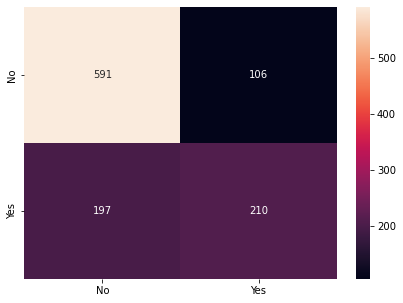

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Bagging

In [56]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.723207948899929


<AxesSubplot:>

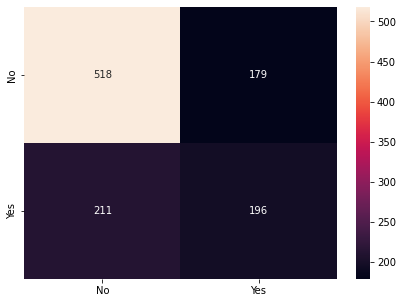

In [57]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [58]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

0.7750177430801988


<AxesSubplot:>

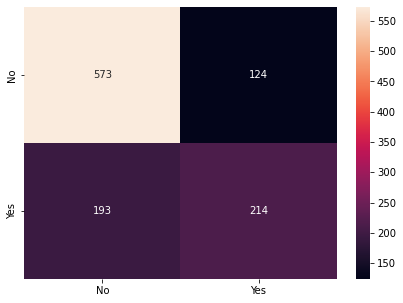

In [59]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.7239176721078779


<AxesSubplot:>

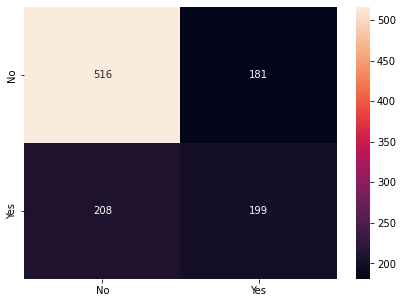

In [61]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


### Conclusion

Gradient boosting perform welll